## Data Exploration - Bank Marketing Dataset

Let's explore this dataset and see what we can find!

### Import libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

### Load the data

Note: The file uses semicolon as separator

In [246]:
data = pd.read_csv('marketing-data/train.csv', delimiter=';')

print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns\n")
data.head(10)

Dataset has 2999 rows and 21 columns



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### Check basic info

In [247]:
# check data types and missing values
print("Data Info:")
print("="*60)
data.info()

print("\nChecking for missing values:")
print("="*60)
missing = data.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2999 non-null   int64  
 1   job             2999 non-null   object 
 2   marital         2999 non-null   object 
 3   education       2999 non-null   object 
 4   default         2999 non-null   object 
 5   housing         2999 non-null   object 
 6   loan            2999 non-null   object 
 7   contact         2999 non-null   object 
 8   month           2999 non-null   object 
 9   day_of_week     2999 non-null   object 
 10  duration        2999 non-null   int64  
 11  campaign        2999 non-null   int64  
 12  pdays           2999 non-null   int64  
 13  previous        2999 non-null   int64  
 14  poutcome        2999 non-null   object 
 15  emp.var.rate    2999 non-null   float64
 16  cons.price.idx  2999 non-null   float64
 17  cons.conf.idx   2999 n

In [248]:
# basic statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2999.0,39.889296,10.282229,18.000,32.000,38.000,47.000,88.000
duration,2999.0,255.085028,256.265737,0.000,101.000,180.000,316.000,3643.000
campaign,2999.0,2.526842,2.556995,1.000,1.000,2.000,3.000,35.000
pdays,2999.0,962.227743,187.599866,0.000,999.000,999.000,999.000,999.000
previous,2999.0,0.192064,0.551960,0.000,0.000,0.000,0.000,6.000
emp.var.rate,2999.0,0.079093,1.559126,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,2999.0,93.584553,0.581162,92.201,93.075,93.876,93.994,94.767
cons.conf.idx,2999.0,-40.578226,4.594237,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,2999.0,3.605769,1.739625,0.635,1.334,4.857,4.961,5.045
nr.employed,2999.0,5165.642314,74.384632,4963.600,5099.100,5191.000,5228.100,5228.100


## Target Variable - Subscription Rate

The dataset is very imbalanced!

### How many people subscribed?

In [249]:
target_counts = data['y'].value_counts()
target_props = data['y'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print("="*60)
for val in ['no', 'yes']:
    print(f"  {val}: {target_counts[val]} ({target_props[val]:.2f}%)")

ratio = target_counts['no'] / target_counts['yes']
print(f"\nImbalance Ratio: {ratio:.2f}:1 (no:yes)")

Target Variable Distribution:
  no: 2668 (88.96%)
  yes: 331 (11.04%)

Imbalance Ratio: 8.06:1 (no:yes)


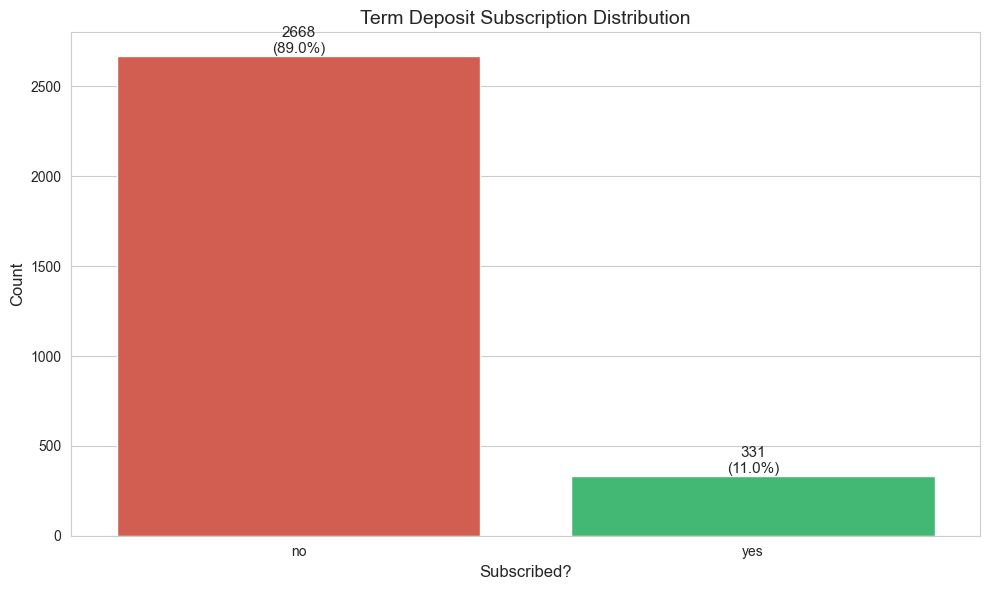

In [250]:
# plot the distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='y', data=data, palette=['#e74c3c', '#2ecc71'])
plt.title('Term Deposit Subscription Distribution', fontsize=14)
plt.xlabel('Subscribed?', fontsize=12)
plt.ylabel('Count', fontsize=12)

# add counts on bars
for p in ax.patches:
    height = p.get_height()
    pct = height / len(data) * 100
    ax.annotate(f'{int(height)}\n({pct:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

## Analyzing Categorical Features

Let's see which customer groups are more likely to subscribe

### Job type analysis

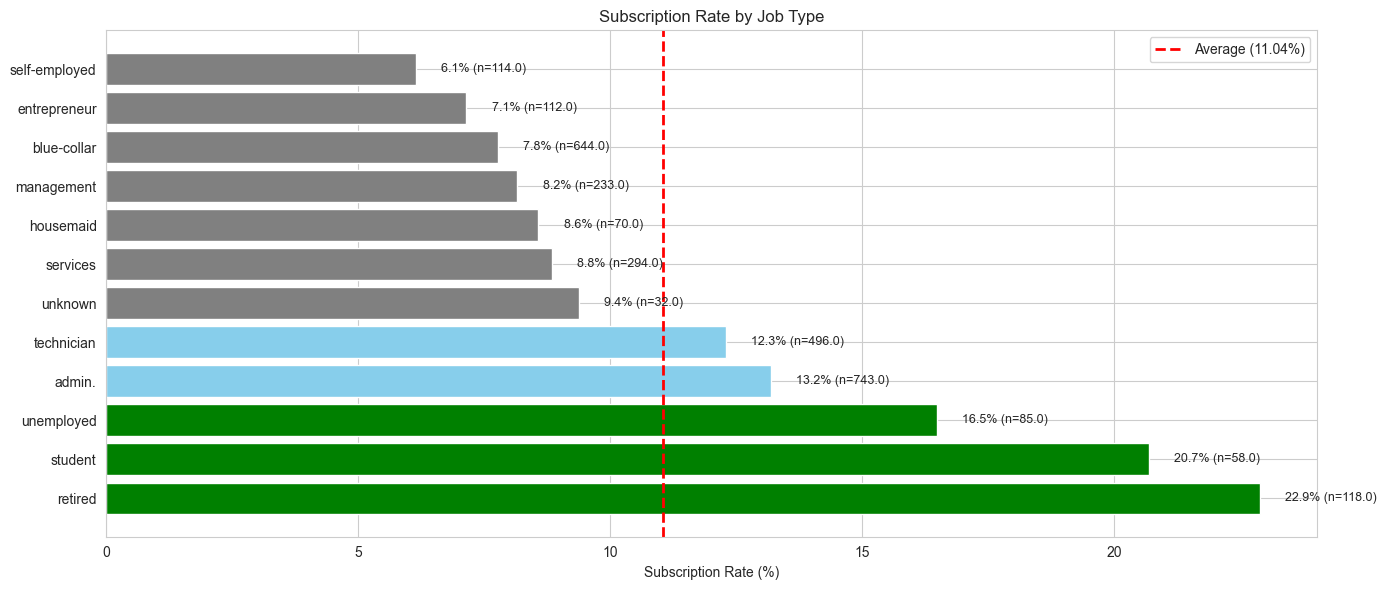

Retired people and students have much higher subscription rates!


In [251]:
# calculate subscription rates by job
job_sub = pd.crosstab(data['job'], data['y'], normalize='index') * 100
job_counts = pd.crosstab(data['job'], data['y'])
job_total = job_counts.sum(axis=1)

job_data = pd.DataFrame({
    'subscription_rate': job_sub['yes'],
    'total_customers': job_total
}).sort_values('subscription_rate', ascending=False)

# plot it
plt.figure(figsize=(14, 6))
colors = ['green' if x > 15 else 'skyblue' if x > 11 else 'gray' for x in job_data['subscription_rate']]
bars = plt.barh(job_data.index, job_data['subscription_rate'], color=colors)
plt.axvline(11.04, color='red', linestyle='--', linewidth=2, label='Average (11.04%)')
plt.xlabel('Subscription Rate (%)')
plt.title('Subscription Rate by Job Type')
plt.legend()

for i, (idx, row) in enumerate(job_data.iterrows()):
    plt.text(row['subscription_rate'] + 0.5, i, f"{row['subscription_rate']:.1f}% (n={row['total_customers']})", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Retired people and students have much higher subscription rates!")

### Contact method - cellular vs telephone

Contact Method Performance:
  cellular: 14.01% (1935 contacts)
  telephone: 5.64% (1064 contacts)

Cellular is 2.5x better than telephone!


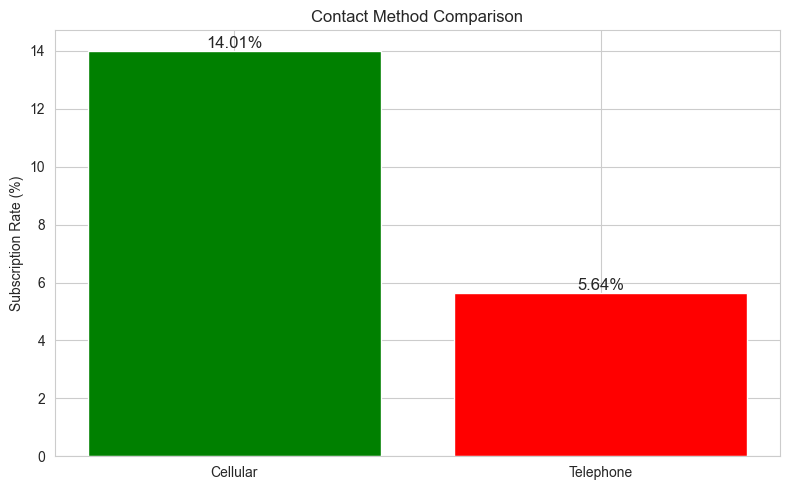

In [252]:
contact_sub = pd.crosstab(data['contact'], data['y'], normalize='index') * 100
contact_counts = pd.crosstab(data['contact'], data['y']).sum(axis=1)

print("Contact Method Performance:")
print("="*60)
for method in ['cellular', 'telephone']:
    rate = contact_sub.loc[method, 'yes']
    count = contact_counts[method]
    print(f"  {method}: {rate:.2f}% ({count} contacts)")

improvement = contact_sub.loc['cellular', 'yes'] / contact_sub.loc['telephone', 'yes']
print(f"\nCellular is {improvement:.1f}x better than telephone!")

# visualize
plt.figure(figsize=(8, 5))
contact_data = pd.DataFrame({
    'method': ['Cellular', 'Telephone'],
    'rate': [contact_sub.loc['cellular', 'yes'], contact_sub.loc['telephone', 'yes']]
})
bars = plt.bar(contact_data['method'], contact_data['rate'], color=['green', 'red'])
plt.ylabel('Subscription Rate (%)')
plt.title('Contact Method Comparison')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Which months work best?

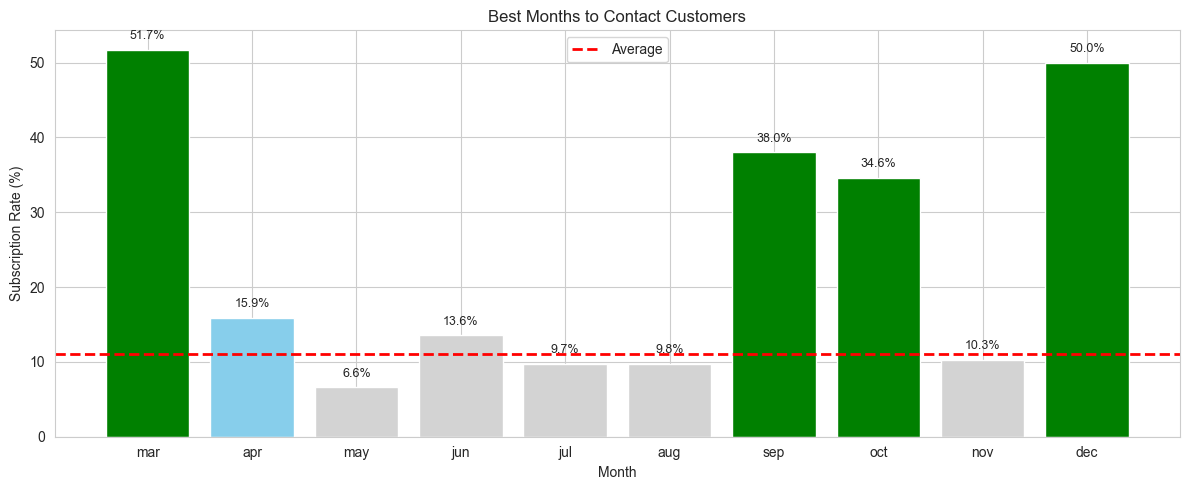

March, December, and September are the best months!


In [253]:
month_sub = pd.crosstab(data['month'], data['y'], normalize='index') * 100
month_counts = pd.crosstab(data['month'], data['y']).sum(axis=1)
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
available_months = [m for m in month_order if m in month_sub.index]

month_data = pd.DataFrame({
    'month': available_months,
    'rate': [month_sub.loc[m, 'yes'] for m in available_months],
    'count': [month_counts[m] for m in available_months]
})

plt.figure(figsize=(12, 5))
colors = ['green' if x > 30 else 'skyblue' if x > 15 else 'lightgray' for x in month_data['rate']]
bars = plt.bar(month_data['month'], month_data['rate'], color=colors)
plt.axhline(11.04, color='red', linestyle='--', linewidth=2, label='Average')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Month')
plt.title('Best Months to Contact Customers')
plt.legend()

for bar, count in zip(bars, month_data['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("March, December, and September are the best months!")

### Previous campaign outcome

This is really important!

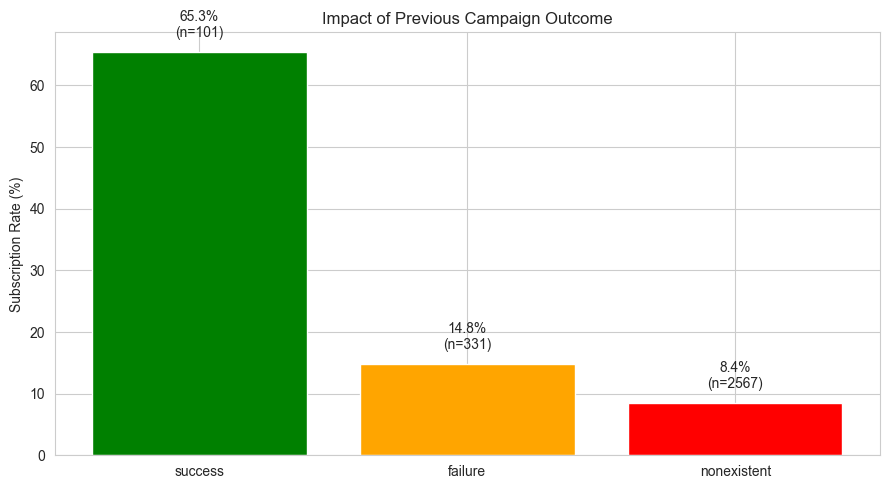

If previous campaign was successful, 65% subscribe again!


In [254]:
poutcome_sub = pd.crosstab(data['poutcome'], data['y'], normalize='index') * 100
poutcome_counts = pd.crosstab(data['poutcome'], data['y']).sum(axis=1)

poutcome_data = pd.DataFrame({
    'outcome': poutcome_sub.index,
    'rate': poutcome_sub['yes'].values,
    'count': poutcome_counts.values
}).sort_values('rate', ascending=False)

plt.figure(figsize=(9, 5))
colors = ['green', 'orange', 'red']
bars = plt.bar(poutcome_data['outcome'], poutcome_data['rate'], color=colors)
plt.ylabel('Subscription Rate (%)')
plt.title('Impact of Previous Campaign Outcome')

for bar, count in zip(bars, poutcome_data['count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%\n(n={count})', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("If previous campaign was successful, 65% subscribe again!")

### Checking 'unknown' values

In [255]:
print("Analyzing 'unknown' values:")
print("="*70)

categorical_cols = data.select_dtypes(include=['object']).columns
unknown_info = []

for col in categorical_cols:
    if col == 'y':
        continue
    if 'unknown' in data[col].values:
        unknown_count = (data[col] == 'unknown').sum()
        unknown_pct = unknown_count / len(data) * 100
        
        unknown_sub = data[data[col] == 'unknown']['y'].value_counts(normalize=True).get('yes', 0) * 100
        known_sub = data[data[col] != 'unknown']['y'].value_counts(normalize=True).get('yes', 0) * 100
        
        unknown_info.append({
            'Feature': col,
            'Unknown Count': unknown_count,
            'Unknown %': unknown_pct,
            'Sub Rate (unknown)': unknown_sub,
            'Sub Rate (known)': known_sub
        })

unknown_df = pd.DataFrame(unknown_info)
print(unknown_df.to_string(index=False))

print("\nNote: Will keep 'unknown' as its own category")

Analyzing 'unknown' values:
  Feature  Unknown Count  Unknown %  Sub Rate (unknown)  Sub Rate (known)
      job             32   1.067022            9.375000         11.054938
  marital              9   0.300100           11.111111         11.036789
education            138   4.601534           15.942029         10.800419
  default            596  19.873291            7.046980         12.026633
  housing             77   2.567523            6.493506         11.156742
     loan             77   2.567523            6.493506         11.156742

Note: Will keep 'unknown' as its own category


## Numerical Features

### Age distribution

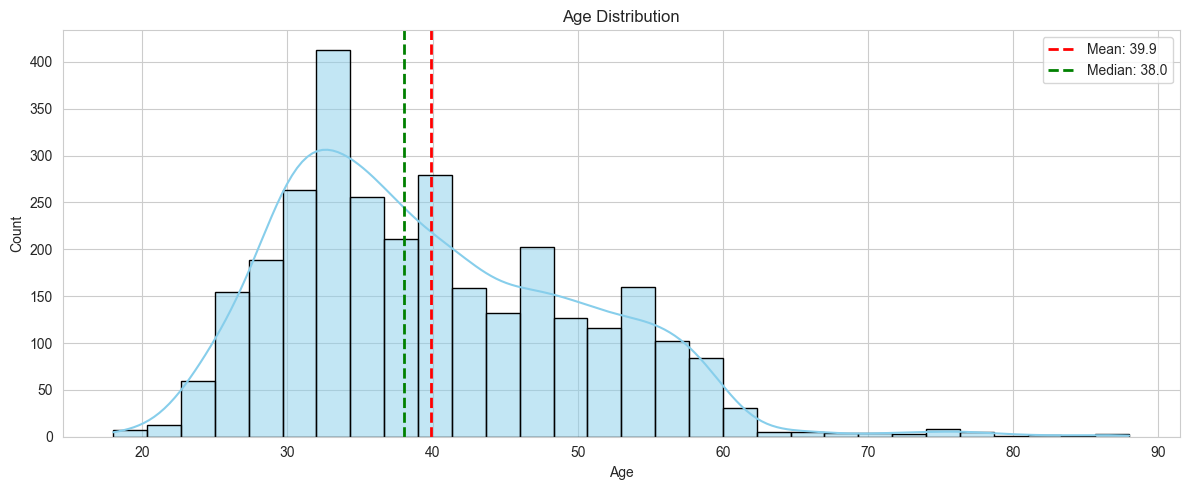

In [256]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='age', bins=30, kde=True, color='skyblue', edgecolor='black')
mean_age = data['age'].mean()
median_age = data['age'].median()

plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', linewidth=2, label=f'Median: {median_age:.1f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

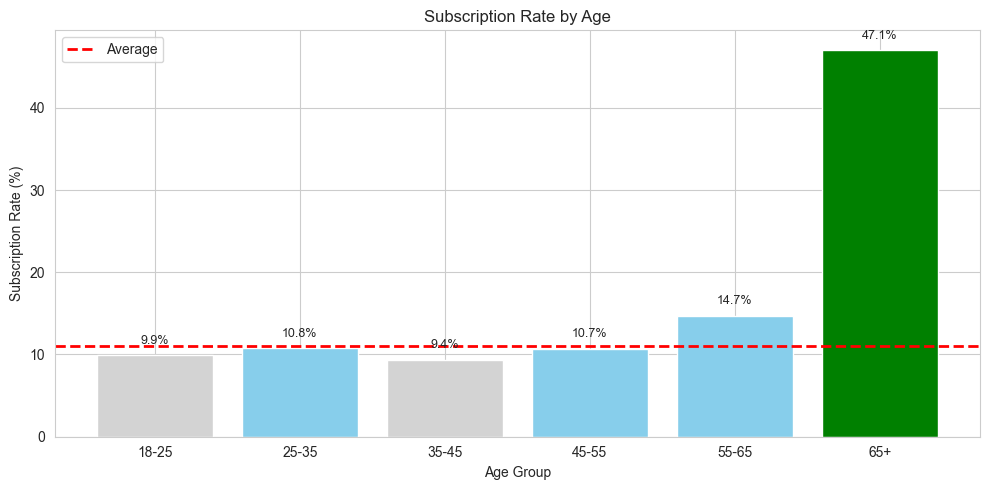

Older people (65+) are way more likely to subscribe!


In [257]:
# create age groups
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

age_sub = pd.crosstab(data['age_group'], data['y'], normalize='index') * 100
age_counts = pd.crosstab(data['age_group'], data['y']).sum(axis=1)

plt.figure(figsize=(10, 5))
colors = ['green' if x > 15 else 'skyblue' if x > 10 else 'lightgray' for x in age_sub['yes']]
bars = plt.bar(age_labels, age_sub['yes'], color=colors)
plt.axhline(11.04, color='red', linestyle='--', linewidth=2, label='Average')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Age Group')
plt.title('Subscription Rate by Age')
plt.legend()

for bar, count in zip(bars, age_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("Older people (65+) are way more likely to subscribe!")

### Campaign contacts - how many calls?

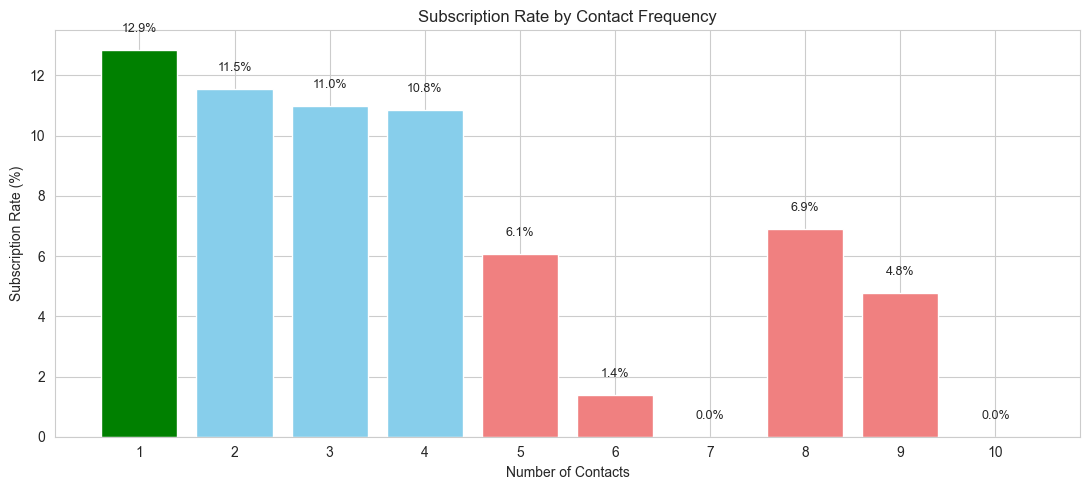

First contact works best - calling too many times actually hurts!


In [258]:
campaign_sub = data.groupby('campaign')['y'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)
campaign_counts = data['campaign'].value_counts().sort_index()

# just look at first 10
campaign_data = pd.DataFrame({
    'contacts': campaign_sub.index[:10],
    'rate': campaign_sub.values[:10],
    'count': [campaign_counts.get(i, 0) for i in campaign_sub.index[:10]]
})

plt.figure(figsize=(11, 5))
bars = plt.bar(campaign_data['contacts'].astype(str), campaign_data['rate'], 
               color=['green' if i == 1 else 'skyblue' if r > 10 else 'lightcoral' 
                      for i, r in zip(campaign_data['contacts'], campaign_data['rate'])])
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Number of Contacts')
plt.title('Subscription Rate by Contact Frequency')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("First contact works best - calling too many times actually hurts!")

### Duration analysis - IMPORTANT!

Duration is highly correlated with subscription BUT we only know duration after the call ends! So we can't use it for prediction (data leakage problem).

Call Duration:
  Average duration (no):  216 seconds
  Average duration (yes): 570 seconds
  Difference: 354 seconds

BUT - we only know duration AFTER the call!
So we can't use this feature for prediction


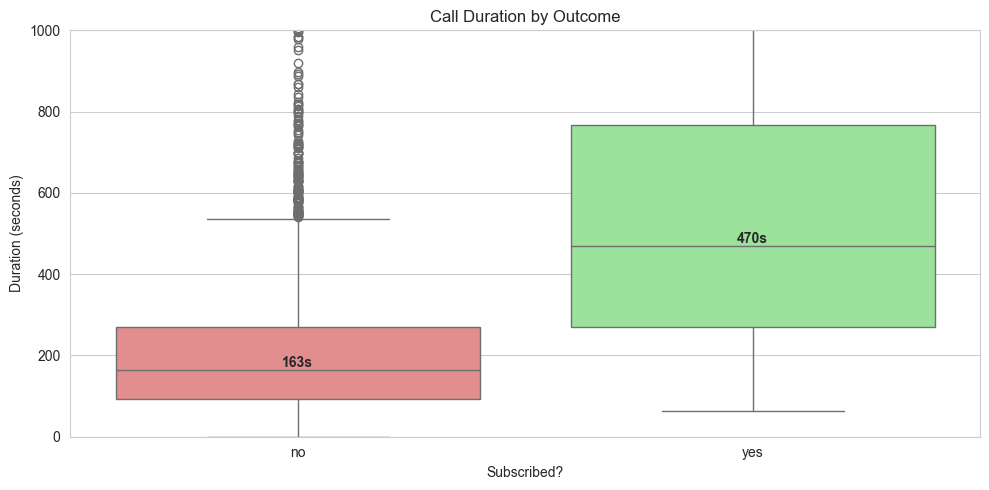

In [259]:
duration_no = data[data['y'] == 'no']['duration'].mean()
duration_yes = data[data['y'] == 'yes']['duration'].mean()

print("Call Duration:")
print("="*50)
print(f"  Average duration (no):  {duration_no:.0f} seconds")
print(f"  Average duration (yes): {duration_yes:.0f} seconds")
print(f"  Difference: {duration_yes - duration_no:.0f} seconds")
print("\nBUT - we only know duration AFTER the call!")
print("So we can't use this feature for prediction")

plt.figure(figsize=(10, 5))
sns.boxplot(x='y', y='duration', data=data, palette=['lightcoral', 'lightgreen'])
plt.title('Call Duration by Outcome')
plt.xlabel('Subscribed?')
plt.ylabel('Duration (seconds)')
plt.ylim(0, 1000)

medians = data.groupby('y')['duration'].median()
for i, (val, median) in enumerate(medians.items()):
    plt.text(i, median, f'{median:.0f}s', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Previous contact history

Previous Contact Analysis:
  Never contacted: 2888 people (96.3%)
  Previously contacted: 111 people (3.7%)

  Subscription rate (never contacted): 9.00%
  Subscription rate (previously contacted): 63.96%

Previously contacted customers are 7.1x more likely to subscribe!


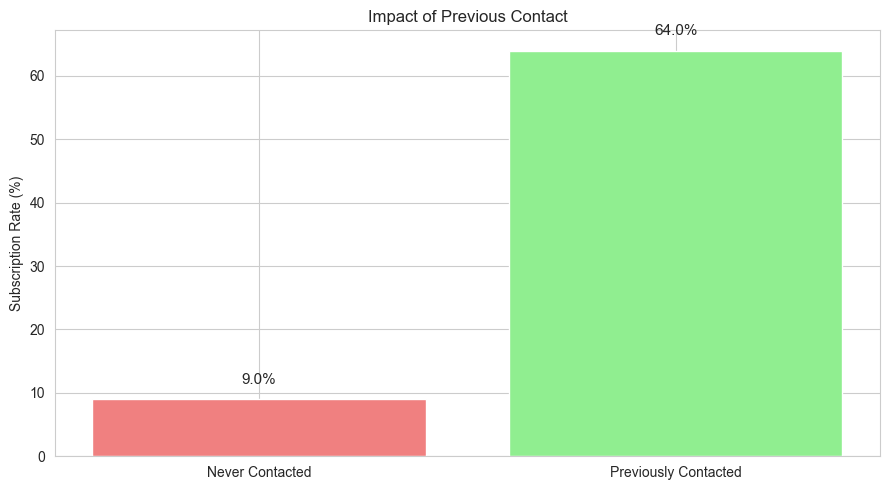

In [260]:
# pdays = 999 means never contacted before
never_contacted = (data['pdays'] == 999).sum()
prev_contacted = (data['pdays'] != 999).sum()

never_sub_rate = data[data['pdays'] == 999]['y'].value_counts(normalize=True).get('yes', 0) * 100
prev_sub_rate = data[data['pdays'] != 999]['y'].value_counts(normalize=True).get('yes', 0) * 100

print("Previous Contact Analysis:")
print("="*50)
print(f"  Never contacted: {never_contacted} people ({never_contacted/len(data)*100:.1f}%)")
print(f"  Previously contacted: {prev_contacted} people ({prev_contacted/len(data)*100:.1f}%)")
print(f"\n  Subscription rate (never contacted): {never_sub_rate:.2f}%")
print(f"  Subscription rate (previously contacted): {prev_sub_rate:.2f}%")
print(f"\nPreviously contacted customers are {prev_sub_rate/never_sub_rate:.1f}x more likely to subscribe!")

contact_status = pd.DataFrame({
    'Status': ['Never Contacted', 'Previously Contacted'],
    'Rate': [never_sub_rate, prev_sub_rate],
    'Count': [never_contacted, prev_contacted]
})

plt.figure(figsize=(9, 5))
bars = plt.bar(contact_status['Status'], contact_status['Rate'], color=['lightcoral', 'lightgreen'])
plt.ylabel('Subscription Rate (%)')
plt.title('Impact of Previous Contact')

for bar, count in zip(bars, contact_status['Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

### Correlation analysis

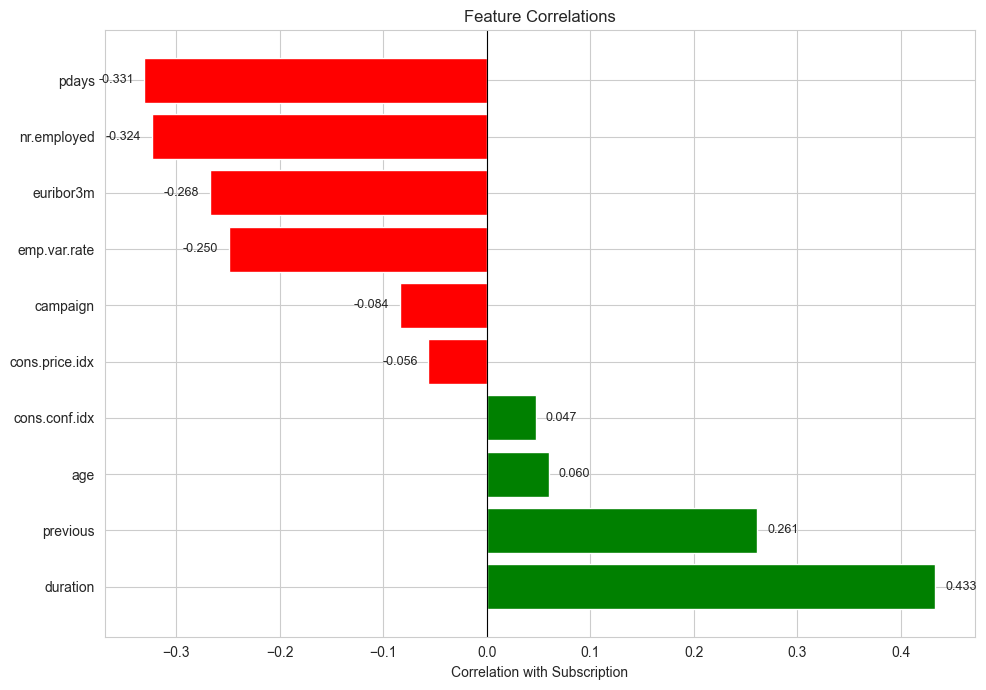


Top features (ignoring duration):
  previous: +0.2611
  age: +0.0596
  cons.conf.idx: +0.0470
  cons.price.idx: -0.0565
  campaign: -0.0842


In [261]:
# convert target to binary for correlation
data_corr = data.copy()
data_corr['y_binary'] = (data_corr['y'] == 'yes').astype(int)

numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                 'euribor3m', 'nr.employed']

correlations = data_corr[numerical_cols + ['y_binary']].corr()['y_binary'].drop('y_binary').sort_values(ascending=False)

plt.figure(figsize=(10, 7))
colors = ['green' if x > 0 else 'red' for x in correlations]
bars = plt.barh(correlations.index, correlations.values, color=colors)
plt.xlabel('Correlation with Subscription')
plt.title('Feature Correlations')
plt.axvline(0, color='black', linewidth=0.8)

for bar, val in zip(bars, correlations.values):
    plt.text(val + 0.01 if val > 0 else val - 0.01, bar.get_y() + bar.get_height()/2.,
             f'{val:.3f}', va='center', ha='left' if val > 0 else 'right', fontsize=9)

plt.tight_layout()
plt.show()

print("\nTop features (ignoring duration):")
for col, corr in correlations.drop('duration').head(5).items():
    print(f"  {col}: {corr:+.4f}")

### Economic indicators

These variables are highly correlated with each other (multicollinearity problem)

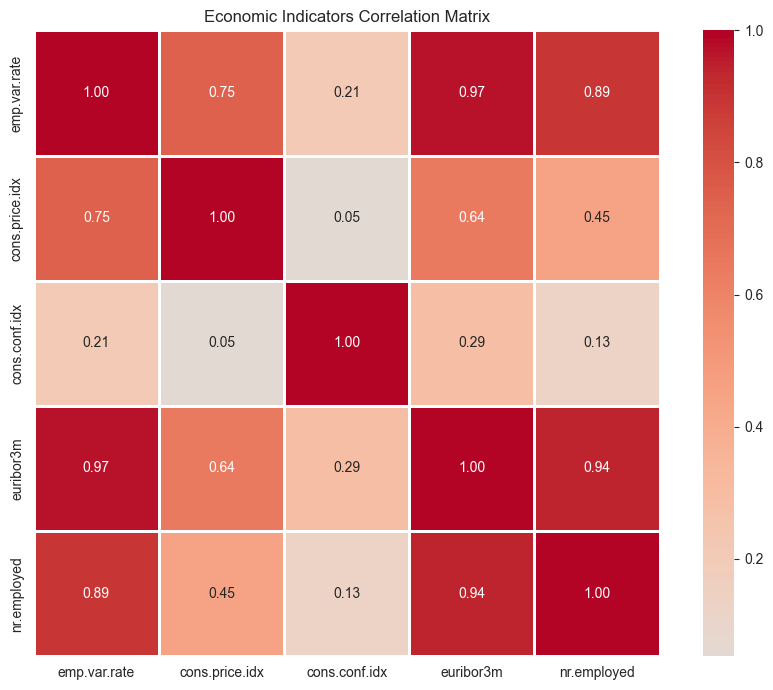

Highly correlated pairs (>0.7):
  emp.var.rate <-> cons.price.idx: 0.746
  emp.var.rate <-> euribor3m: 0.970
  emp.var.rate <-> nr.employed: 0.892
  euribor3m <-> nr.employed: 0.940

Will drop emp.var.rate, cons.price.idx, cons.conf.idx to avoid multicollinearity


In [262]:
economic_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
econ_corr = data[economic_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(econ_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1)
plt.title('Economic Indicators Correlation Matrix')
plt.tight_layout()
plt.show()

print("Highly correlated pairs (>0.7):")
for i in range(len(economic_cols)):
    for j in range(i+1, len(economic_cols)):
        corr_val = econ_corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"  {economic_cols[i]} <-> {economic_cols[j]}: {corr_val:.3f}")

print("\nWill drop emp.var.rate, cons.price.idx, cons.conf.idx to avoid multicollinearity")

## Data Preprocessing

### What we'll do:
- Remove duration (data leakage)
- Remove 3 economic indicators (multicollinearity)
- Create new features based on our findings
- Encode categorical variables
- Transform skewed features

In [287]:
# load fresh data
train = pd.read_csv('marketing-data/train.csv', delimiter=';')
# test file doesn't have header
test = pd.read_csv('marketing-data/test.csv', delimiter=';', header=None, names=train.columns)

print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (2999, 21)
Test: (1120, 21)


### Define preprocessing function

In [288]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df, is_train=True):
    """Preprocess the marketing data"""
    df = df.copy()
    
    if 'duration' in df.columns:
        df = df.drop(['duration'], axis=1)
    
    if 'age' in df.columns:
        age_bins = [18, 25, 35, 45, 55, 65, 100]
        age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
        df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    
    econ_to_drop = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
    econ_to_drop = [col for col in econ_to_drop if col in df.columns]
    if econ_to_drop:
        df = df.drop(econ_to_drop, axis=1)
    
    if is_train and 'y' in df.columns:
        df['y'] = (df['y'] == 'yes').astype(int)
    
    # One-hot encode
    onehot_cols = ['poutcome', 'contact', 'month', 'age_group']
    onehot_cols = [col for col in onehot_cols if col in df.columns]
    
    if onehot_cols:
        df = pd.get_dummies(df, columns=onehot_cols, drop_first=False, dtype=int)
    
    label_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week']
    le = LabelEncoder()
    for col in label_cols:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col].astype(str))
    
    # Log transform skewed features
    if 'campaign' in df.columns:
        df['campaign_log'] = np.log1p(df['campaign'])
    if 'previous' in df.columns:
        df['previous_log'] = np.log1p(df['previous'])
    
    return df

### Apply preprocessing

In [289]:
print("Processing train set...")
train_processed = preprocess_data(train, is_train=True)
print(f"Train shape: {train_processed.shape}")

print("\nProcessing test set...")
test_processed = preprocess_data(test, is_train=False)
print(f"Test shape: {test_processed.shape}")

print("\nFirst few rows:")
train_processed.head()

Processing train set...
Train shape: (2999, 37)

Processing test set...
Test shape: (1120, 37)

First few rows:


,age,job,marital,education,default,housing,loan,day_of_week,campaign,pdays,...,month_oct,month_sep,age_group_18-25,age_group_25-35,age_group_35-45,age_group_45-55,age_group_55-65,age_group_65+,campaign_log,previous_log
0,30,1,1,2,0,2,0,0,2,999,...,0,0,0,1,0,0,0,0,1.098612,0.0
1,39,7,2,3,0,0,0,0,4,999,...,0,0,0,0,1,0,0,0,1.609438,0.0
2,25,7,1,3,0,2,0,4,1,999,...,0,0,1,0,0,0,0,0,0.693147,0.0
3,38,7,1,2,0,1,1,0,3,999,...,0,0,0,0,1,0,0,0,1.386294,0.0
4,47,0,1,5,0,2,0,1,1,999,...,0,0,0,0,0,1,0,0,0.693147,0.0


### Align columns and save

In [290]:
# Align columns between train and test
if 'y' in train_processed.columns:
    y_train = train_processed['y']
    train_processed = train_processed.drop(['y'], axis=1)

train_cols = set(train_processed.columns)
test_cols = set(test_processed.columns)

for col in train_cols - test_cols:
    test_processed[col] = 0

for col in test_cols - train_cols:
    train_processed[col] = 0

train_processed = train_processed[sorted(train_processed.columns)]
test_processed = test_processed[sorted(test_processed.columns)]

train_processed['y'] = y_train

print(f"Final train shape: {train_processed.shape}")
print(f"Final test shape: {test_processed.shape}")

Final train shape: (2999, 37)
Final test shape: (1120, 37)


In [291]:
# Save processed data
train_processed.to_csv('marketing-data/train_processed.csv', index=False)
test_processed.to_csv('marketing-data/test_processed.csv', index=False)

print("Saved!")
print("  - train_processed.csv")
print("  - test_processed.csv")

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)

Saved!
  - train_processed.csv
  - test_processed.csv

PREPROCESSING COMPLETE!


---
## Machine Learning Models

Now let's build models to predict subscription

### Import additional libraries for modeling

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

### Load processed data

In [293]:
# Load the processed data
df = pd.read_csv("marketing-data/train_processed.csv")
print("Data loaded successfully")
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1] - 1} (excluding target)")

df.head()

Data loaded successfully
Shape: (2999, 37)
Features: 36 (excluding target)


,age,age_group_18-25,age_group_25-35,age_group_35-45,age_group_45-55,age_group_55-65,age_group_65+,campaign,campaign_log,contact_cellular,...,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,previous_log,y
0,30,0,1,0,0,0,0,2,1.098612,1,...,0,0,5099.1,999,0,1,0,0,0.0,0
1,39,0,0,1,0,0,0,4,1.609438,0,...,0,0,5191.0,999,0,1,0,0,0.0,0
2,25,1,0,0,0,0,0,1,0.693147,0,...,0,0,5228.1,999,0,1,0,0,0.0,0
3,38,0,0,1,0,0,0,3,1.386294,0,...,0,0,5228.1,999,0,1,0,0,0.0,0
4,47,0,0,0,1,0,0,1,0.693147,1,...,0,0,5195.8,999,0,1,0,0,0.0,0


### Split data and apply SMOTE

In [294]:
# Split X, Y (target is 'y' column already as 0/1)
X = df.drop("y", axis=1)
Y = df["y"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

print("\nBefore scaling:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE on train set
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)
print("\nTest class distribution:")
print(Y_test.value_counts())
print("\nTrain class distribution before SMOTE:")
print(Y_train.value_counts())
print("\nTrain class distribution after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())


Before scaling:
X_train: (2399, 36) X_test: (600, 36)

Test class distribution:
y
0    534
1     66
Name: count, dtype: int64

Train class distribution before SMOTE:
y
0    2134
1     265
Name: count, dtype: int64

Train class distribution after SMOTE:
y
1    2134
0    2134
Name: count, dtype: int64


In [295]:
# Create DataFrame after SMOTE (just train set)
train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled_df["y"] = Y_train_resampled

train_resampled_df

,age,age_group_18-25,age_group_25-35,age_group_35-45,age_group_45-55,age_group_55-65,age_group_65+,campaign,campaign_log,contact_cellular,...,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,previous_log,y
0,-0.389759,-0.203058,-0.757725,1.521031,-0.507934,-0.289066,-0.102619,-0.604355,-0.865497,0.747532,...,-0.130217,-0.130217,-0.886727,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,1
1,-1.460816,4.924696,-0.757725,-0.657449,-0.507934,-0.289066,-0.102619,-0.206592,-0.029745,-1.337735,...,-0.130217,-0.130217,-1.194177,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,0
2,-0.389759,-0.203058,-0.757725,1.521031,-0.507934,-0.289066,-0.102619,-0.206592,-0.029745,0.747532,...,-0.130217,-0.130217,0.411546,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,0
3,-0.973972,-0.203058,1.319740,-0.657449,-0.507934,-0.289066,-0.102619,-0.604355,-0.865497,0.747532,...,-0.130217,-0.130217,0.845199,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,0
4,-0.779234,-0.203058,1.319740,-0.657449,-0.507934,-0.289066,-0.102619,-0.206592,-0.029745,0.747532,...,-0.130217,-0.130217,0.411546,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,-0.549128,-0.203058,0.375709,0.332485,-0.507934,-0.289066,-0.102619,-0.387341,-0.409523,0.747532,...,-0.130217,-0.130217,0.845199,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,1
4264,-0.101215,-0.203058,-0.757725,1.521031,-0.507934,-0.289066,-0.102619,-0.604355,-0.865497,0.747532,...,-0.130217,-0.130217,-0.886727,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,1
4265,0.091797,-0.203058,-0.757725,1.521031,-0.507934,-0.289066,-0.102619,-0.604355,-0.865497,0.747532,...,-0.130217,-0.130217,0.845199,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,1
4266,-0.539717,-0.203058,0.308780,0.402669,-0.507934,-0.289066,-0.102619,0.008242,0.104089,0.747532,...,-0.130217,-0.130217,0.845199,0.201941,-0.364242,0.424299,-0.191658,-0.361014,-0.402643,1


### Machine Learning Class

In [296]:
class MachineLearning:
    def __init__(self, df, X_train, X_test, Y_train, Y_test, feature_configs=None, feature_names=None):
        """
        Initialize ML class with flexible feature selection per model
        
        Parameters:
        - df: DataFrame with all original data
        - X_train, X_test: Training and test features (can be numpy arrays or DataFrames)
        - Y_train, Y_test: Training and test labels
        - feature_configs: dict, optional
            - If None: use all features for all models
            - If dict with 'default' key: use those features for all models
            - If dict with model names as keys: use specific features per model
        - feature_names: list, optional
            - List of feature names (required if X_train/X_test are numpy arrays)
        
        Example:
            feature_configs = {
                'default': ['age', 'euribor3m', 'pdays'],  # for most models
                'logreg': ['age_group_65+', 'euribor3m'],  # specific for logistic regression
                'randomforest': ['age', 'pdays', 'previous']  # specific for random forest
            }
        """
        self.df = df
        
        # Get feature names
        if feature_names is not None:
            self.all_features = feature_names
        elif hasattr(X_train, 'columns'):
            self.all_features = list(X_train.columns)
        elif 'y' in df.columns:
            self.all_features = list(df.drop('y', axis=1).columns)
        else:
            self.all_features = list(df.columns)
        # Store original data (as numpy arrays)
        self.X_train_full = X_train
        self.X_test_full = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        
        # Store feature configurations
        self.feature_configs = feature_configs or {}
        
        # Initialize with default features (will be set per model during evaluation)
        self.X_train = X_train
        self.X_test = X_test

        # Default configurations
        self.configs = {
            "knn": {"n_neighbors": 5, "weights": "uniform", "algorithm": "auto", "leaf_size": 30, "p": 2},
            "logreg": {"penalty": "l2", "dual": False, "tol": 1e-4, "C": 1.0, "solver": "lbfgs", "max_iter": 100},
            "svm": {"C": 1.0, "kernel": "rbf", "degree": 3, "gamma": "scale", "coef0": 0.0},
            "decisiontree": {"criterion": "gini", "splitter": "best", "max_depth": None, "min_samples_split": 2},
            "randomforest": {"n_estimators": 100, "criterion": "gini", "max_depth": None, "min_samples_split": 2},
            "xgboost": {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3, "verbosity": 1},
            "gradientboosting": {"loss": "log_loss", "learning_rate": 0.1, "n_estimators": 100, "subsample": 1.0},
            "naivebayes": {},
            "mlp": {"hidden_layer_sizes": (100,), "activation": "relu", "solver": "adam", "max_iter": 200},
        }

        # Initialize models
        self.knn = KNeighborsClassifier(**self.configs["knn"])
        self.logreg = LogisticRegression(**self.configs["logreg"])
        self.svm = SVC(**self.configs["svm"])
        self.decisiontree = DecisionTreeClassifier(**self.configs["decisiontree"])
        self.randomforest = RandomForestClassifier(**self.configs["randomforest"])
        self.xgboost = XGBClassifier(**self.configs["xgboost"])
        self.gradientboosting = GradientBoostingClassifier(**self.configs["gradientboosting"])
        self.naivebayes = GaussianNB(**self.configs["naivebayes"])
        self.mlp = MLPClassifier(**self.configs["mlp"])

    def update_config(self, model_name, new_config):
        if model_name in self.configs:
            # Merge new configuration
            self.configs[model_name] = {**self.configs[model_name], **new_config}

            # Updated configuration
            if model_name == "knn":
                self.knn = KNeighborsClassifier(**self.configs["knn"])
            elif model_name == "logreg":
                self.logreg = LogisticRegression(**self.configs["logreg"])
            elif model_name == "svm":
                self.svm = SVC(**self.configs["svm"])
            elif model_name == "decisiontree":
                self.decisiontree = DecisionTreeClassifier(**self.configs["decisiontree"])
            elif model_name == "randomforest":
                self.randomforest = RandomForestClassifier(**self.configs["randomforest"])
            elif model_name == "xgboost":
                self.xgboost = XGBClassifier(**self.configs["xgboost"])
            elif model_name == "gradientboosting":
                self.gradientboosting = GradientBoostingClassifier(**self.configs["gradientboosting"])
            elif model_name == "naivebayes":
                self.naivebayes = GaussianNB(**self.configs["naivebayes"])
            elif model_name == "mlp":
                self.mlp = MLPClassifier(**self.configs["mlp"])
        else:
            raise ValueError(f"Model '{model_name}' not recognized. Available models: {list(self.configs.keys())}")

    def _get_features_for_model(self, model_name):
        """Get feature subset for specific model"""
        if not self.feature_configs:
            return self.X_train_full, self.X_test_full, self.all_features
        
        # Check if model has specific features
        if model_name in self.feature_configs:
            feature_list = self.feature_configs[model_name]
        elif 'default' in self.feature_configs:
            feature_list = self.feature_configs['default']
        else:
            return self.X_train_full, self.X_test_full, self.all_features
        
        # Get column indices
        feature_indices = [i for i, col in enumerate(self.all_features) if col in feature_list]
        
        if isinstance(self.X_train_full, np.ndarray):
            X_train_subset = self.X_train_full[:, feature_indices]
            X_test_subset = self.X_test_full[:, feature_indices]
        else:
            X_train_subset = self.X_train_full[feature_list]
            X_test_subset = self.X_test_full[feature_list]
        
        return X_train_subset, X_test_subset, feature_list

    def plot_confusion_matrix(self, y_true, y_pred, model_name, normalize=True):
        cm = confusion_matrix(self.Y_test, y_pred)
        labels = np.unique(self.Y_test)

        if normalize:
            cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
            fmt = ".2f"
            title = f"Normalized confusion matrix - {model_name}"
        else:
            fmt = "d"
            title = f"Confusion matrix - {model_name}"

        cm_df = pd.DataFrame(
            cm,
            index=[f"True {l}" for l in labels],
            columns=[f"Pred {l}" for l in labels]
        )

        plt.figure(figsize=(5.5, 5))
        sns.heatmap(
            cm_df,
            annot=True,
            fmt=fmt,
            cmap="Oranges",
            linewidths=0.5,
            linecolor="gray",
            square=True
        )
        plt.title(title, fontsize=13)
        plt.xlabel("Predicted label", fontsize=11)
        plt.ylabel("True label", fontsize=11)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def evaluate_model(self, model, model_name, show_report=True, show_cm=True):
        # Get features for this specific model
        X_train_model, X_test_model, features_used = self._get_features_for_model(model_name)
        
        # Train
        model.fit(X_train_model, self.Y_train)
        y_pred = model.predict(X_test_model)

        acc = accuracy_score(self.Y_test, y_pred)
        prec = precision_score(self.Y_test, y_pred, average="weighted", zero_division=0)
        rec = recall_score(self.Y_test, y_pred, average="weighted", zero_division=0)
        f1 = f1_score(self.Y_test, y_pred, average="weighted", zero_division=0)

        print("\n" + "=" * 50)
        print(f"MODEL: {model_name.upper()}")
        print("- Configuration:", self.configs.get(model_name, {}))
        if features_used != self.all_features:
            print(f"- Features used: {len(features_used)} out of {len(self.all_features)}")
        print("\nResults on test set:")
        print(f"  • Accuracy : {acc:.4f}")
        print(f"  • Precision: {prec:.4f}")
        print(f"  • Recall   : {rec:.4f}")
        print(f"  • F1-score : {f1:.4f}")

        if show_report:
            print("\nDetailed metrics per class:")
            print(classification_report(self.Y_test, y_pred, zero_division=0))

        if show_cm:
            self.plot_confusion_matrix(self.Y_test, y_pred, model_name, normalize=False)
            self.plot_confusion_matrix(self.Y_test, y_pred, model_name, normalize=True)

    def compare_performances(self, models):
        """
        Compare multiple models (uses model-specific features if configured)
        """
        performance_data = []

        for model_name in models:
            model = getattr(self, model_name, None)
            if model is None:
                print(f"Model '{model_name}' not found. Skipping.")
                continue

            # Get features for this model
            X_train_model, X_test_model, features_used = self._get_features_for_model(model_name)
            
            # Train model with model-specific features
            model.fit(X_train_model, self.Y_train)
            
            # Predict using model-specific features
            y_pred = model.predict(X_test_model)

            metrics = {
                "Model": model_name.upper(),
                "Accuracy": accuracy_score(self.Y_test, y_pred),
                "Precision": precision_score(self.Y_test, y_pred, average="weighted", zero_division=0),
                "Recall": recall_score(self.Y_test, y_pred, average="weighted", zero_division=0),
                "F1-Score": f1_score(self.Y_test, y_pred, average="weighted", zero_division=0),
                "N_Features": len(features_used)
            }
            performance_data.append(metrics)

        performance_df = pd.DataFrame(performance_data)
        performance_df.sort_values(by="Accuracy", ascending=False, inplace=True)
        return performance_df

print("MachineLearning class ready")

MachineLearning class ready


### Initialize ML object

In [297]:
all_features = list(X_train.columns)
print(f"Total features: {len(all_features)}")

ml = MachineLearning(
    df=df,
    X_train=X_train_resampled,
    X_test=X_test_scaled,
    Y_train=Y_train_resampled,
    Y_test=Y_test,
    feature_configs=None,
    feature_names=all_features
)

# Configure models with optimized hyperparameters
ml.update_config("knn", {"n_neighbors": 15, "weights": "distance", "p": 1, "metric": "manhattan"})
ml.update_config("logreg", {"C": 15.0, "solver": "saga", "max_iter": 5000, "penalty": "l2", "class_weight": "balanced"})
ml.update_config("svm", {"C": 15.0, "kernel": "rbf", "gamma": "scale", "class_weight": "balanced", "cache_size": 1000})
ml.update_config("mlp", {"hidden_layer_sizes": (300, 200, 100), "activation": "relu", "solver": "adam", "max_iter": 5000, "alpha": 0.0001, "learning_rate": "adaptive", "early_stopping": True, "validation_fraction": 0.2, "n_iter_no_change": 30, "batch_size": 64})
ml.update_config("naivebayes", {})
ml.update_config("randomforest", {"n_estimators": 1500, "max_depth": 20, "min_samples_split": 2, "min_samples_leaf": 1, "max_features": "sqrt", "bootstrap": True, "max_samples": 0.9, "class_weight": "balanced_subsample"})
ml.update_config("xgboost", {"n_estimators": 1500, "learning_rate": 0.02, "max_depth": 15, "subsample": 0.85, "colsample_bytree": 0.85, "colsample_bylevel": 0.9, "gamma": 0.1, "reg_alpha": 0.05, "reg_lambda": 1.5, "min_child_weight": 2, "scale_pos_weight": 1})
ml.update_config("gradientboosting", {"n_estimators": 1500, "learning_rate": 0.02, "max_depth": 15, "subsample": 0.85, "min_samples_split": 2, "min_samples_leaf": 1, "max_features": "sqrt", "validation_fraction": 0.15, "n_iter_no_change": 30, "tol": 1e-6})
ml.update_config("decisiontree", {"criterion": "gini", "max_depth": 35, "min_samples_split": 2, "min_samples_leaf": 1, "max_features": "sqrt", "class_weight": "balanced"})

print(f"\nML initialized successfully with {len(all_features)} features")
print("Optimized: deeper trees (depth 15-35), more estimators (1500), lower LR (0.02), balanced weights")

Total features: 36

ML initialized successfully with 36 features
Optimized: deeper trees (depth 15-35), more estimators (1500), lower LR (0.02), balanced weights


### Evaluate individual models

Let's test different algorithms


MODEL: KNN
- Configuration: {'n_neighbors': 13, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 30, 'p': 1, 'metric': 'manhattan'}

Results on test set:
  • Accuracy : 0.7700
  • Precision: 0.8445
  • Recall   : 0.7700
  • F1-score : 0.8002

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       534
           1       0.22      0.44      0.30        66

    accuracy                           0.77       600
   macro avg       0.57      0.63      0.58       600
weighted avg       0.84      0.77      0.80       600



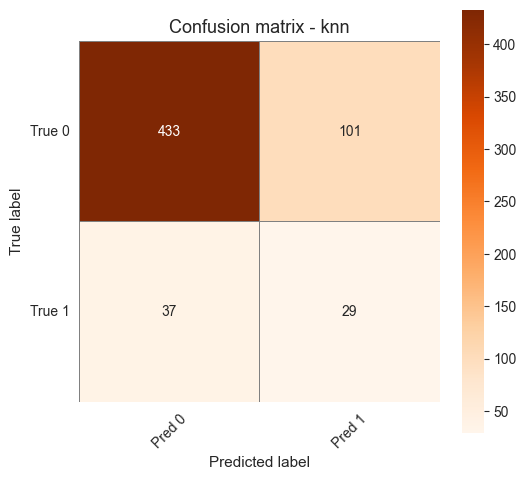

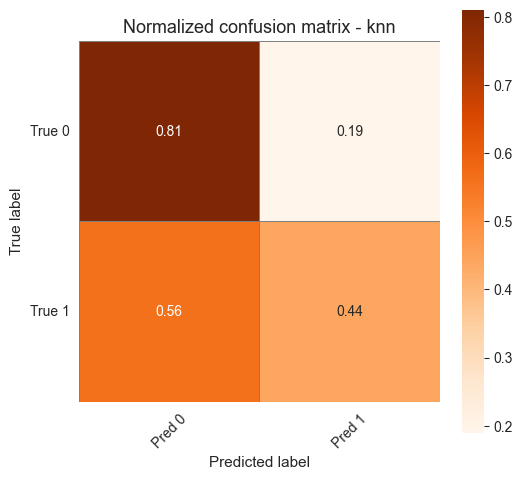

In [274]:
ml.evaluate_model(ml.knn, "knn")


MODEL: LOGREG
- Configuration: {'penalty': 'l2', 'dual': False, 'tol': 0.0001, 'C': 10.0, 'solver': 'saga', 'max_iter': 3000}

Results on test set:
  • Accuracy : 0.7533
  • Precision: 0.8495
  • Recall   : 0.7533
  • F1-score : 0.7903

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       534
           1       0.22      0.50      0.31        66

    accuracy                           0.75       600
   macro avg       0.57      0.64      0.58       600
weighted avg       0.85      0.75      0.79       600



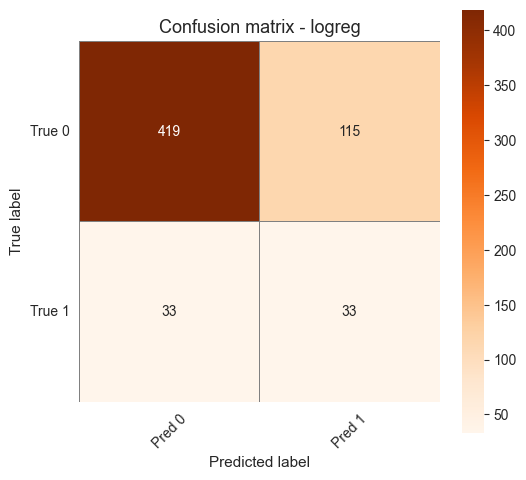

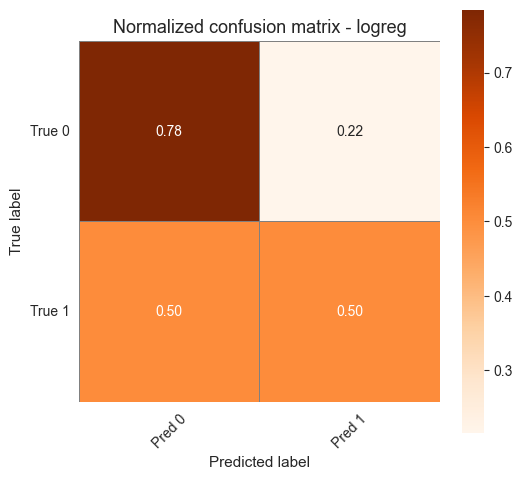

In [275]:
ml.evaluate_model(ml.logreg, "logreg")


MODEL: SVM
- Configuration: {'C': 10.0, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale', 'coef0': 0.0, 'class_weight': 'balanced', 'cache_size': 500}

Results on test set:
  • Accuracy : 0.8000
  • Precision: 0.8261
  • Recall   : 0.8000
  • F1-score : 0.8122

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       534
           1       0.19      0.26      0.22        66

    accuracy                           0.80       600
   macro avg       0.55      0.56      0.55       600
weighted avg       0.83      0.80      0.81       600



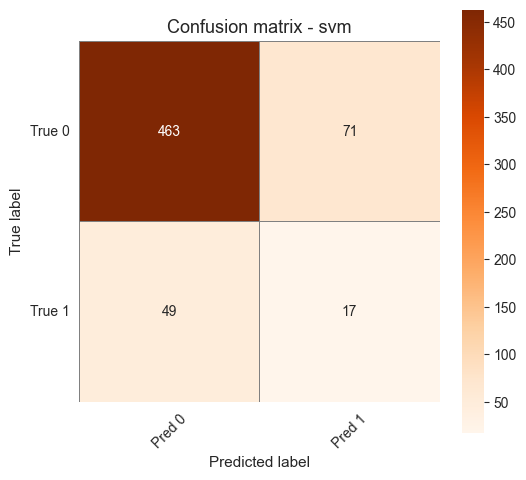

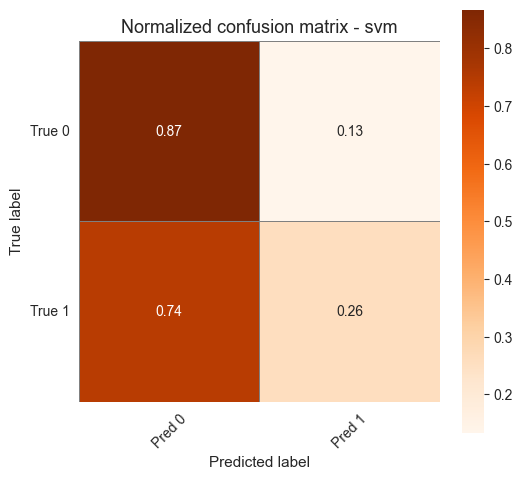

In [276]:
ml.evaluate_model(ml.svm, "svm")


MODEL: DECISIONTREE
- Configuration: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}

Results on test set:
  • Accuracy : 0.8133
  • Precision: 0.8317
  • Recall   : 0.8133
  • F1-score : 0.8220

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       534
           1       0.22      0.27      0.24        66

    accuracy                           0.81       600
   macro avg       0.56      0.58      0.57       600
weighted avg       0.83      0.81      0.82       600



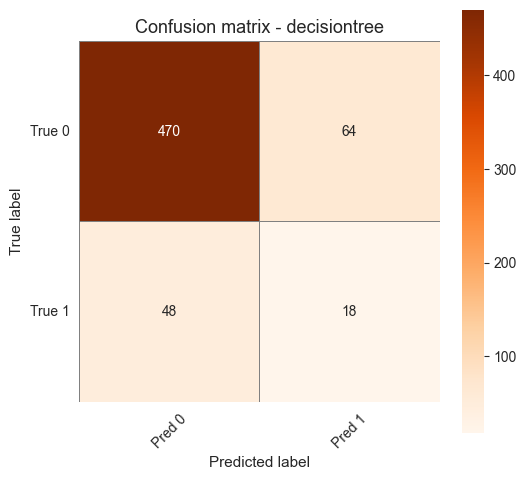

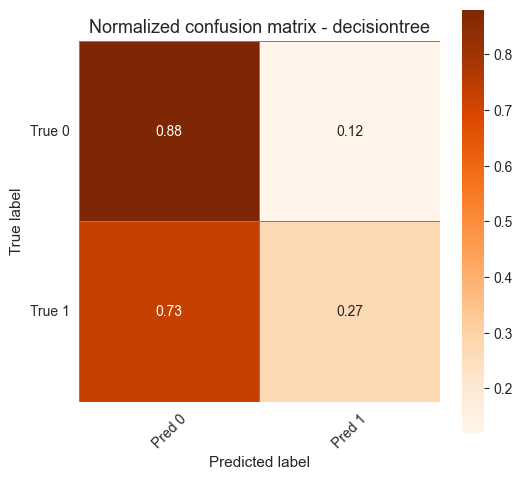

In [277]:
ml.evaluate_model(ml.decisiontree, "decisiontree")


MODEL: RANDOMFOREST
- Configuration: {'n_estimators': 1000, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'max_samples': 0.85}

Results on test set:
  • Accuracy : 0.8783
  • Precision: 0.8540
  • Recall   : 0.8783
  • F1-score : 0.8628

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       534
           1       0.41      0.23      0.29        66

    accuracy                           0.88       600
   macro avg       0.66      0.59      0.61       600
weighted avg       0.85      0.88      0.86       600



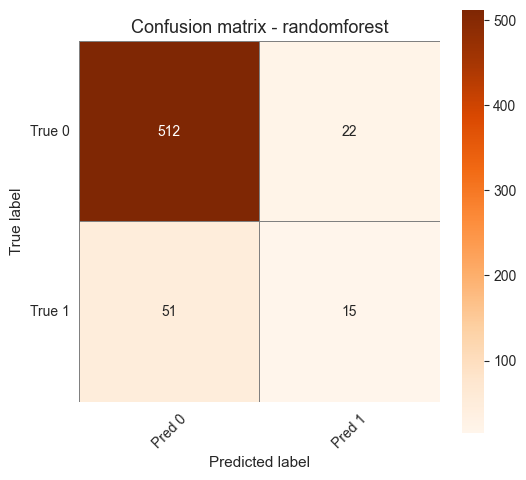

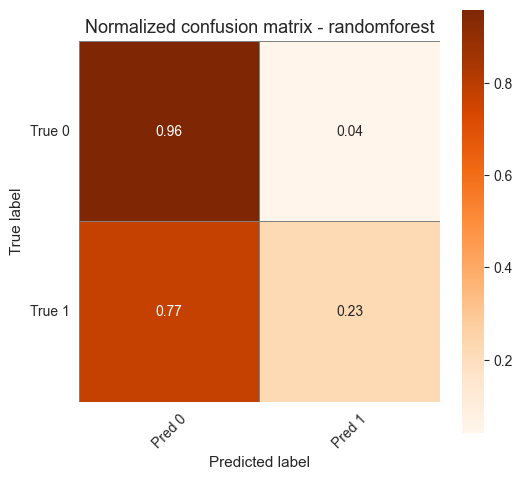

In [278]:
ml.evaluate_model(ml.randomforest, "randomforest")


MODEL: XGBOOST
- Configuration: {'n_estimators': 1000, 'learning_rate': 0.03, 'max_depth': 12, 'verbosity': 1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.85, 'gamma': 0, 'reg_alpha': 0.03, 'reg_lambda': 1.2, 'min_child_weight': 1, 'scale_pos_weight': 1}

Results on test set:
  • Accuracy : 0.8833
  • Precision: 0.8531
  • Recall   : 0.8833
  • F1-score : 0.8618

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       534
           1       0.43      0.18      0.26        66

    accuracy                           0.88       600
   macro avg       0.67      0.58      0.60       600
weighted avg       0.85      0.88      0.86       600



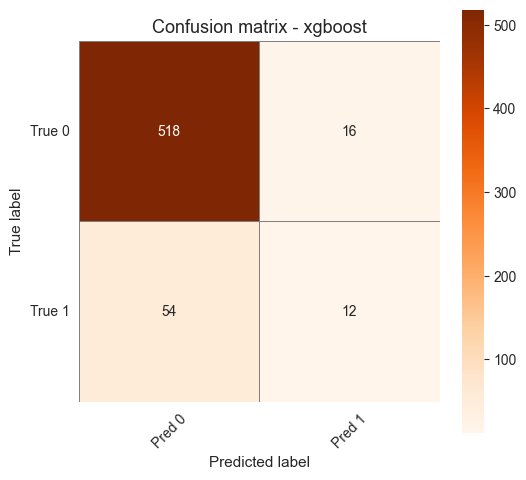

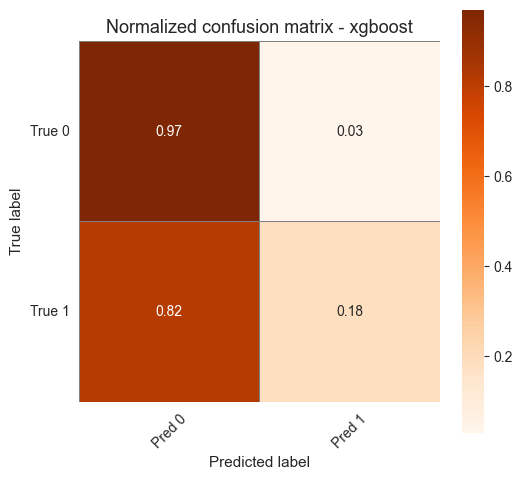

In [279]:
ml.evaluate_model(ml.xgboost, "xgboost")


MODEL: GRADIENTBOOSTING
- Configuration: {'loss': 'log_loss', 'learning_rate': 0.03, 'n_estimators': 1000, 'subsample': 0.8, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'validation_fraction': 0.1, 'n_iter_no_change': 25, 'tol': 1e-05}

Results on test set:
  • Accuracy : 0.8800
  • Precision: 0.8571
  • Recall   : 0.8800
  • F1-score : 0.8654

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       534
           1       0.42      0.24      0.31        66

    accuracy                           0.88       600
   macro avg       0.67      0.60      0.62       600
weighted avg       0.86      0.88      0.87       600



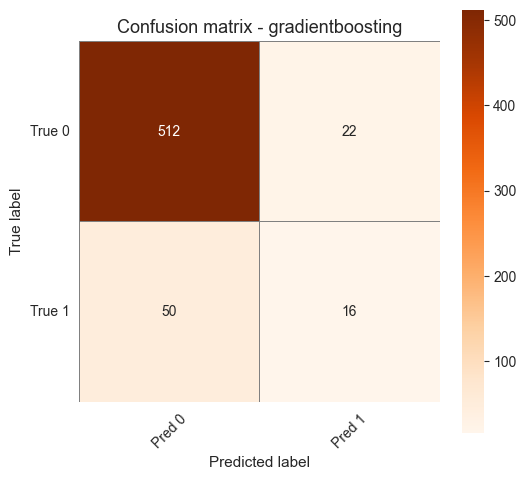

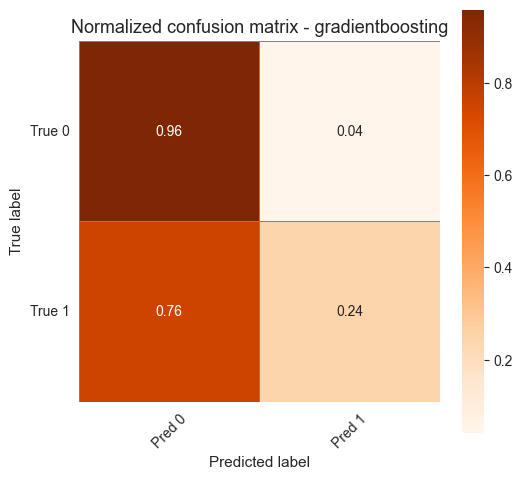

In [280]:
ml.evaluate_model(ml.gradientboosting, "gradientboosting")


MODEL: NAIVEBAYES
- Configuration: {}

Results on test set:
  • Accuracy : 0.8583
  • Precision: 0.8666
  • Recall   : 0.8583
  • F1-score : 0.8623

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       534
           1       0.37      0.42      0.40        66

    accuracy                           0.86       600
   macro avg       0.65      0.67      0.66       600
weighted avg       0.87      0.86      0.86       600



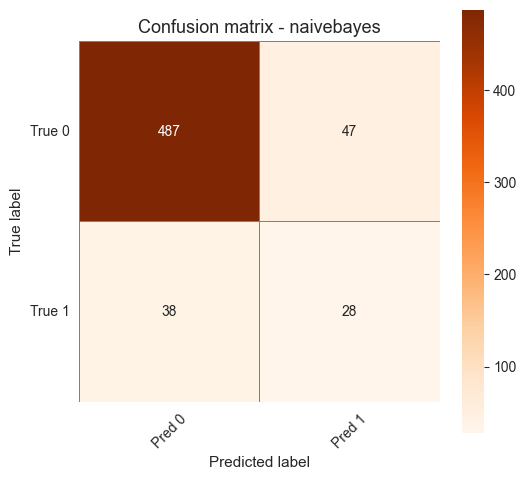

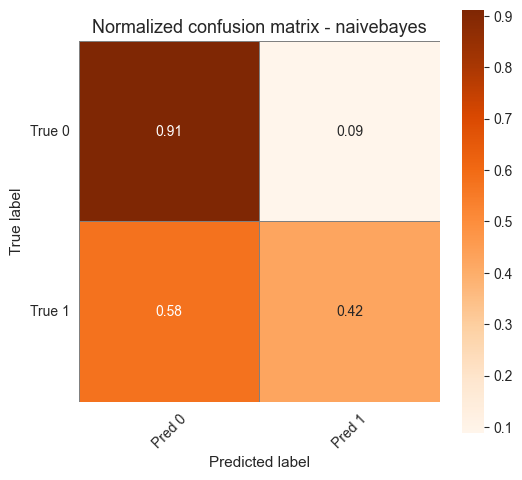

In [281]:
ml.evaluate_model(ml.naivebayes, "naivebayes")


MODEL: MLP
- Configuration: {'hidden_layer_sizes': (256, 128, 64), 'activation': 'relu', 'solver': 'adam', 'max_iter': 3000, 'alpha': 0.0003, 'learning_rate': 'adaptive', 'early_stopping': True, 'validation_fraction': 0.15, 'n_iter_no_change': 25}

Results on test set:
  • Accuracy : 0.8650
  • Precision: 0.8530
  • Recall   : 0.8650
  • F1-score : 0.8584

Detailed metrics per class:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       534
           1       0.36      0.29      0.32        66

    accuracy                           0.86       600
   macro avg       0.64      0.61      0.62       600
weighted avg       0.85      0.86      0.86       600



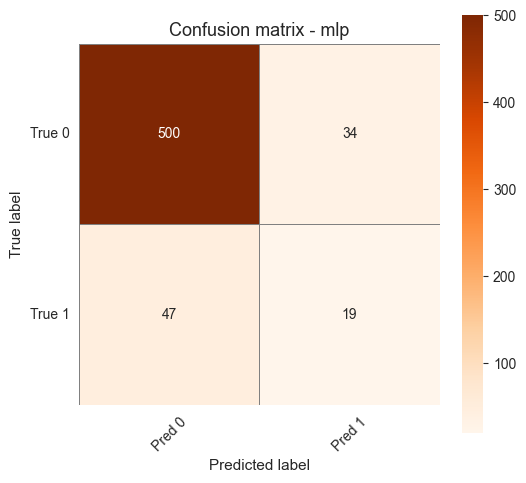

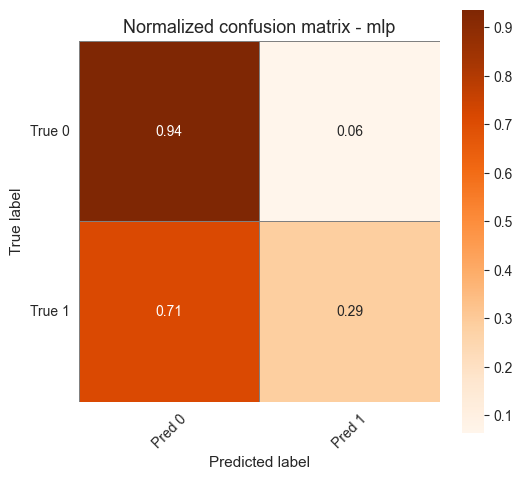

In [282]:
ml.evaluate_model(ml.mlp, "mlp")

### Compare all models

In [285]:
ml.compare_performances(["knn", "logreg", "svm", "decisiontree", "randomforest", "xgboost", "gradientboosting", "naivebayes", "mlp"])

,Model,Accuracy,Precision,Recall,F1-Score,N_Features
6,GRADIENTBOOSTING,0.885000,0.861525,0.885000,0.868973,36
5,XGBOOST,0.881667,0.851349,0.881667,0.860604,36
4,RANDOMFOREST,0.878333,0.853973,0.878333,0.862814,36
7,NAIVEBAYES,0.858333,0.866648,0.858333,0.862253,36
8,MLP,0.841667,0.834066,0.841667,0.837749,36
2,SVM,0.808333,0.825987,0.808333,0.816747,36
3,DECISIONTREE,0.803333,0.820250,0.803333,0.811456,36
0,KNN,0.768333,0.844138,0.768333,0.799046,36
1,LOGREG,0.753333,0.849549,0.753333,0.790335,36
